In [56]:
from read_roi import read_roi_file, read_roi_zip
import skimage.io as io
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [57]:
roi_zip_path = r'D:\课件\ECN第二年DATASIM\Projet\projet mapping segmentation\ROIs\RoiSet.zip'
rois = read_roi_zip(roi_zip_path)
#print(rois)

def rois_dict_to_axis(rois_dict):
    axis_ens = []
    for i, key in enumerate(rois.keys()):
        x = rois_dict[key]['left']
        y = rois_dict[key]['top']
        w = rois_dict[key]['width']
        h = rois_dict[key]['height']
        axis_ens.append([x,y,w,h])
    return axis_ens

rects = rois_dict_to_axis(rois)
print(rects)

[[362, 149, 34, 16], [359, 86, 33, 14], [366, 212, 34, 13], [365, 274, 33, 12], [359, 341, 35, 10], [355, 403, 34, 14], [352, 463, 32, 16]]


In [58]:
# 判断两个框是否重叠
def is_inside(r, q):
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh

# 根据坐标画出物体所在的位置
def draw_detections(img, rects, thickness = 1):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)   # cv2.rectangle(image, 左上角坐标, 右下角坐标, color, 线条粗度)

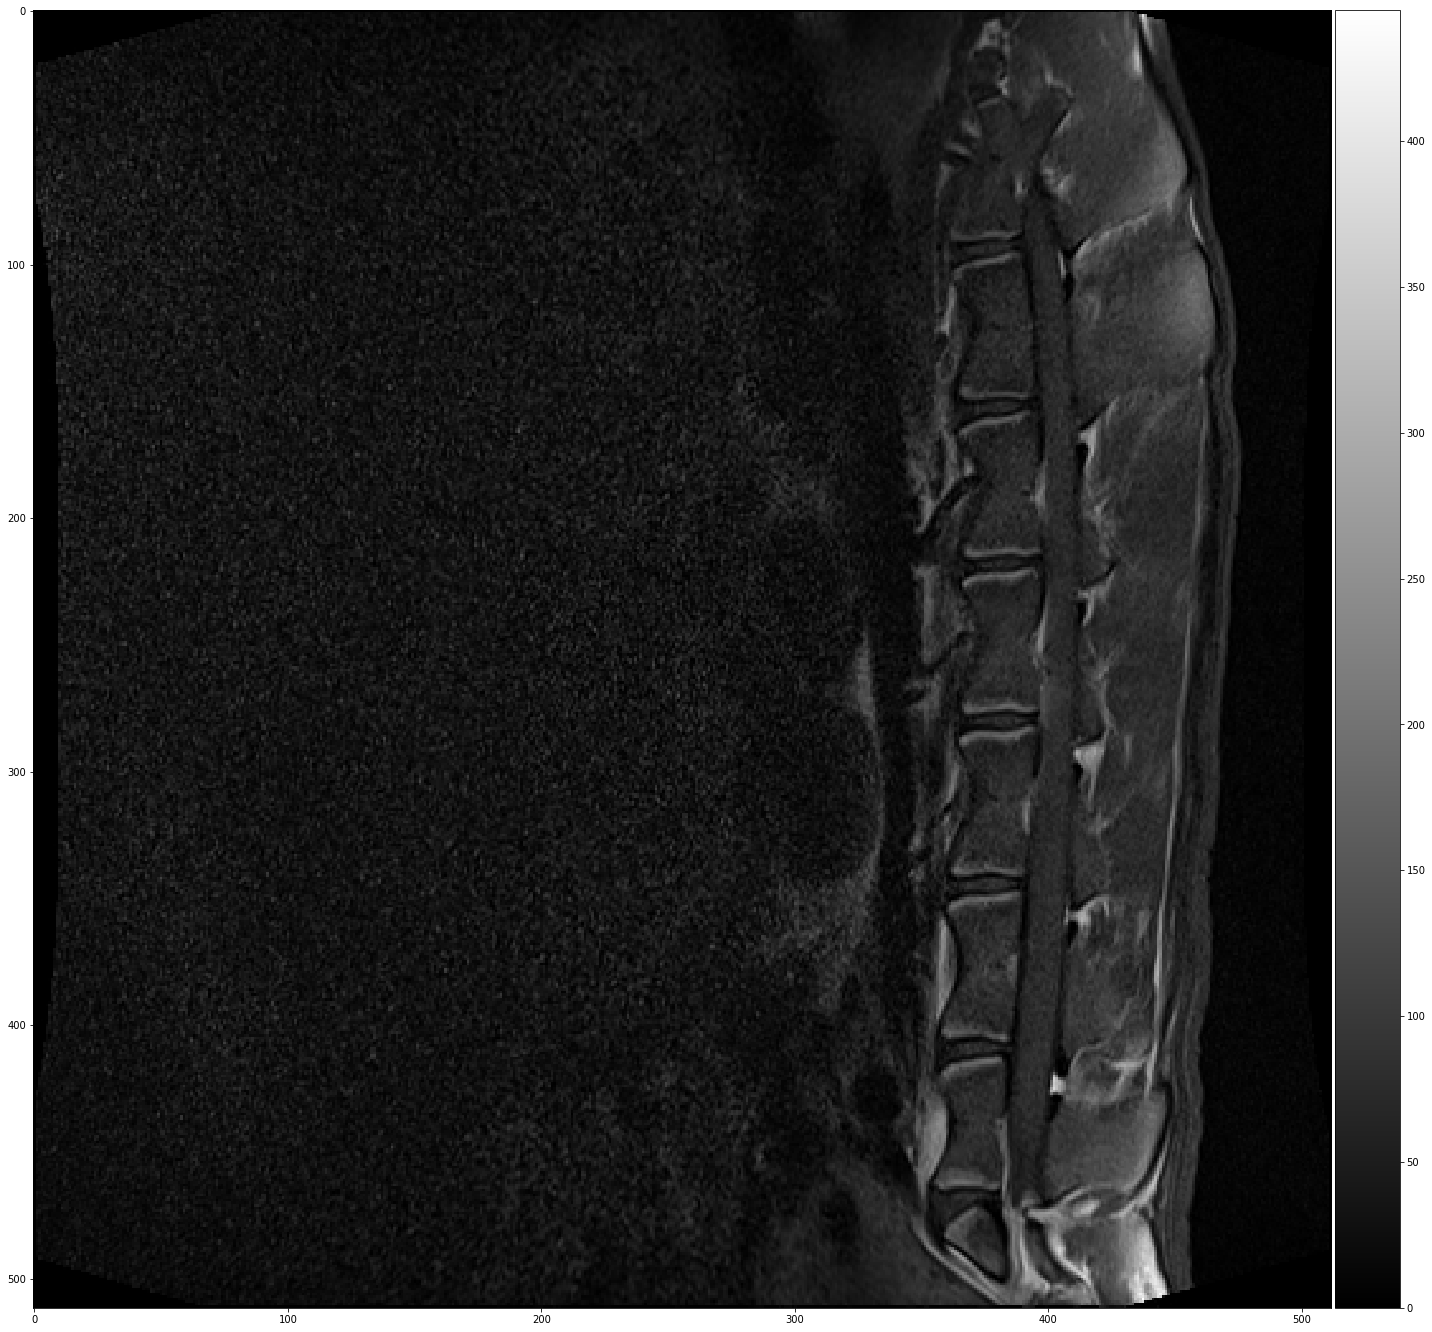

In [66]:
f = r"D:\课件\ECN第二年DATASIM\Projet\projet mapping segmentation\IRM_process\Brebis1\1\T1_TSE_SAG\IM-0029-0004.dcm"
ds = pydicom.dcmread(f)      # dcm format         
im = ds.pixel_array          # array 这里train data是（512，512） dtype = int16

plt.figure(figsize=(20,20))
io.imshow(im,cmap='gray')
plt.show()

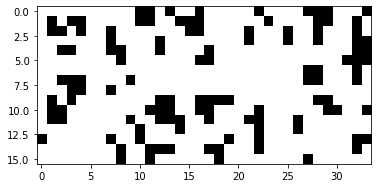

In [64]:
def gmm(im,n):
    data = im.ravel()[:,np.newaxis]

    model = GaussianMixture(n_components = n)
    model.fit(data)
    label_pred = model.predict(data)
    label_pred = label_pred.reshape(im.shape)
    return label_pred

def get_roi(im,rects):
    ims_roi = []
    for i,(x,y,w,h) in enumerate(rects):
        #plt.figure()
        #plt.imshow(im[x:x+h,y:y+w],cmap='gray')
        #plt.show()
        ims_roi.append(im[x:x+h,y:y+w])
    return ims_roi

ims_roi = get_roi(im,rects)
pred = gmm(ims_roi[0],2)
plt.figure()
plt.imshow(pred,cmap='gray')
plt.show()